In [4]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime
from geopy import distance
from geopy import geocoders
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density
import folium as folium

In [5]:
'''
Jan = pd.read_csv(r'/Users/jonachen/Desktop/Divvy/CSV/202201-divvy-tripdata.csv')
Feb = pd.read_csv(r'/Users/jonachen/Desktop/Divvy/CSV/202202-divvy-tripdata.csv')
Mar = pd.read_csv(r'/Users/jonachen/Desktop/Divvy/CSV/202203-divvy-tripdata.csv')
April = pd.read_csv(r'/Users/jonachen/Desktop/Divvy/CSV/202204-divvy-tripdata.csv')
May = pd.read_csv(r'/Users/jonachen/Desktop/Divvy/CSV/202205-divvy-tripdata.csv')
Jun = pd.read_csv(r'/Users/jonachen/Desktop/Divvy/CSV/202206-divvy-tripdata.csv')
Jul = pd.read_csv(r'/Users/jonachen/Desktop/Divvy/CSV/202207-divvy-tripdata.csv')
Aug = pd.read_csv(r'/Users/jonachen/Desktop/Divvy/CSV/202208-divvy-tripdata.csv')
Sept = pd.read_csv(r'/Users/jonachen/Desktop/Divvy/CSV/202209-divvy-tripdata.csv')
Oct = pd.read_csv(r'/Users/jonachen/Desktop/Divvy/CSV/202210-divvy-tripdata.csv')
Nov = pd.read_csv(r'/Users/jonachen/Desktop/Divvy/CSV/202211-divvy-tripdata.csv')
Dec = pd.read_csv(r'/Users/jonachen/Desktop/Divvy/CSV/202212-divvy-tripdata.csv')
'''
Yearly_dist = pd.read_csv(r'/Users/jonachen/Desktop/Divvy/CSV/Divvy_Avg_Dist.csv')
Yearly = pd.read_csv('/Users/jonachen/Desktop/Divvy/CSV/Annual_Divvy_2022.csv')

In [6]:
# Merging all datasets into one whole yearly set
''' Yearly = pd.concat([Jan,Feb,Mar,April,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec], join = 'inner') '''

" Yearly = pd.concat([Jan,Feb,Mar,April,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec], join = 'inner') "

In [7]:
Yearly.head(1)

,Unnamed: 0.1,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.0128,-87.665906,42.01256,-87.674367,casual


In [8]:
type(Yearly)

pandas.core.frame.DataFrame

In [9]:
#Checking for incorrectly structured values in rideable_types,member_casual,and making sure every ride id is unqiue
x = len(Yearly['ride_id'].unique())
y = Yearly['member_casual'].unique()
z = Yearly['member_casual'].unique()

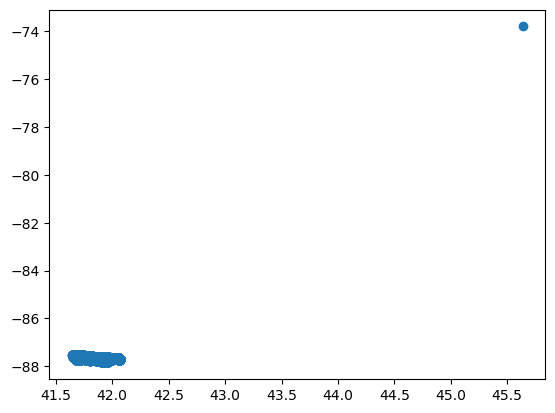

In [10]:
#using a scatter plot to check for any usual outliers from the lat and long col
plt.scatter(Yearly['start_lat'], Yearly['start_lng'])
plt.show()

In [11]:
#locating outlier to confirm that it should not be in the dataset
Yearly[Yearly['start_lng'] > -86]

,Unnamed: 0.1,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
11761,11761,11761,3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.635034,-73.796477,41.8646,-87.681,casual


In [12]:
#removing outlier
Yearly = Yearly[Yearly['start_lng'] < -86]

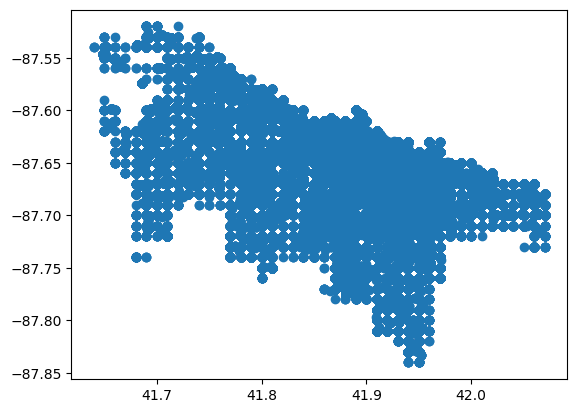

In [13]:
# Scatterplot again to make sure everything is good! It looks like the state of chicago now, just sideways!
plt.scatter(Yearly['start_lat'], Yearly['start_lng'])
plt.show()

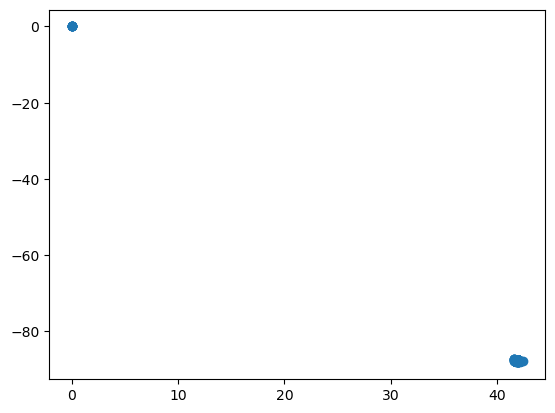

In [14]:
#Same thing for end_lat and end_lng
plt.scatter(Yearly['end_lat'], Yearly['end_lng'])
plt.show()

In [15]:
Yearly[Yearly['end_lng'] == 0]

,Unnamed: 0.1,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5149213,5149213,1037,3B47B333C0D186F0,classic_bike,2022-11-09 13:39:03,2022-11-09 13:44:38,Franklin St & Adams St (Temp),TA1309000008,Green St & Madison Ave*,chargingstx07,41.879434,-87.635504,0.0,0.0,member
5168833,5168833,20657,42AF82C53D831251,electric_bike,2022-11-09 16:17:40,2022-11-09 16:38:06,Laflin St & Cullerton St,13307,Green St & Madison Ave*,chargingstx07,41.854916,-87.663692,0.0,0.0,casual
5173666,5173666,25490,BB8AA29838266294,classic_bike,2022-11-09 11:32:53,2022-11-09 11:37:30,Canal St & Adams St,13011,Green St & Madison Ave*,chargingstx07,41.879255,-87.639904,0.0,0.0,member
5390978,5390978,242802,6AFE1471227BD76F,classic_bike,2022-11-09 16:17:16,2022-11-09 16:26:17,Morgan St & Polk St,TA1307000130,Green St & Madison Ave*,chargingstx07,41.871737,-87.651030,0.0,0.0,casual
5392053,5392053,243877,E9495F1DC3475D41,classic_bike,2022-11-09 12:21:55,2022-11-09 12:26:18,Aberdeen St & Randolph St,18062,Green St & Madison Ave*,chargingstx07,41.884114,-87.654264,0.0,0.0,member
5392312,5392312,244136,75DE33501313D0CE,classic_bike,2022-11-09 15:52:08,2022-11-09 15:52:23,Green St & Madison St,TA1307000120,Green St & Madison Ave*,chargingstx07,41.881892,-87.648789,0.0,0.0,member
5392494,5392494,244318,0A6988FE859F4D54,classic_bike,2022-11-09 10:58:37,2022-11-09 11:06:21,LaSalle St & Jackson Blvd,TA1309000004,Green St & Madison Ave*,chargingstx07,41.878166,-87.631929,0.0,0.0,member
5392565,5392565,244389,7F49424E860E7094,classic_bike,2022-11-09 13:27:04,2022-11-09 13:28:28,Green St & Washington Blvd,13053,Green St & Madison Ave*,chargingstx07,41.883181,-87.648725,0.0,0.0,member


In [16]:
Yearly[Yearly['end_station_name'] == 'Green St & Madison Ave*']
# Green st & madison ave is 41.881827 lat and -87.648832 lng

,Unnamed: 0.1,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5148272,5148272,96,9CE61EF14755D342,electric_bike,2022-11-18 09:58:44,2022-11-18 10:05:27,Franklin St & Adams St (Temp),TA1309000008,Green St & Madison Ave*,chargingstx07,41.879063,-87.635010,41.881827,-87.648832,member
5148586,5148586,410,D2BF299555B6DFD0,classic_bike,2022-11-12 16:20:49,2022-11-12 16:27:37,Aberdeen St & Jackson Blvd,13157,Green St & Madison Ave*,chargingstx07,41.877726,-87.654787,41.881827,-87.648832,member
5148690,5148690,514,DA83EAF5B9F120D1,classic_bike,2022-11-13 16:23:16,2022-11-13 16:27:08,Aberdeen St & Jackson Blvd,13157,Green St & Madison Ave*,chargingstx07,41.877726,-87.654787,41.881827,-87.648832,member
5148712,5148712,536,C31B11AE96CB2D8C,classic_bike,2022-11-24 09:18:30,2022-11-24 09:19:42,Green St & Madison Ave*,chargingstx07,Green St & Madison Ave*,chargingstx07,41.881827,-87.648832,41.881827,-87.648832,member
5148742,5148742,566,4BC908473BCB9814,classic_bike,2022-11-20 14:48:12,2022-11-20 14:48:33,Green St & Madison Ave*,chargingstx07,Green St & Madison Ave*,chargingstx07,41.881827,-87.648832,41.881827,-87.648832,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664876,5664876,178965,228E93A0862EA2EA,classic_bike,2022-12-11 18:50:49,2022-12-11 18:58:32,Canal St & Taylor St,15550,Green St & Madison Ave*,chargingstx07,41.870257,-87.639474,41.881827,-87.648832,member
5664877,5664877,178966,5E8A324CDD58F7F9,classic_bike,2022-12-12 22:57:50,2022-12-12 23:05:08,Canal St & Taylor St,15550,Green St & Madison Ave*,chargingstx07,41.870257,-87.639474,41.881827,-87.648832,member
5664878,5664878,178967,B4CA2EAFDF08B017,classic_bike,2022-12-04 02:52:16,2022-12-04 03:04:32,Franklin St & Chicago Ave,13017,Green St & Madison Ave*,chargingstx07,41.896747,-87.635668,41.881827,-87.648832,member
5664879,5664879,178968,1D4742B57D741786,classic_bike,2022-12-19 21:56:50,2022-12-19 22:04:22,Canal St & Taylor St,15550,Green St & Madison Ave*,chargingstx07,41.870257,-87.639474,41.881827,-87.648832,member


In [17]:
#replacing 0 value lat and lngs with correct values based on lat and long from Green St & Madison Ave*
Yearly.loc[Yearly['end_lat'] == 0, 'end_lat'] = 41.881827
Yearly.loc[Yearly['end_lng'] == 0, 'end_lng'] = -87.648832

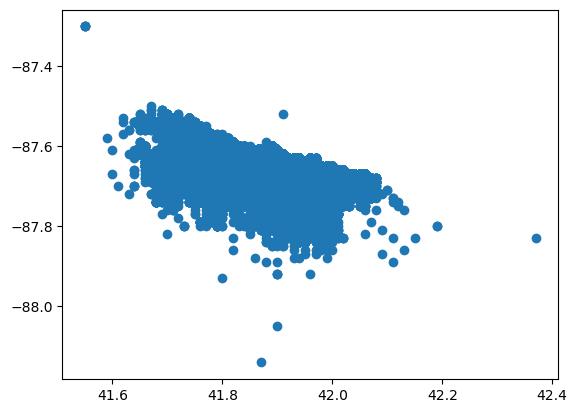

In [18]:
#Scatter plot to check if there are still outliers, The range looks alot better
#lat > 42.2 might be outlier and long > -87.6
plt.scatter(Yearly['end_lat'], Yearly['end_lng'])
plt.show()

In [19]:
Yearly.head(2)

,Unnamed: 0.1,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.01256,-87.674367,casual
1,1,1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.01256,-87.674367,casual


In [20]:
                                                                """ PROCESS """

' PROCESS '

In [21]:
# creating a new column with length of ride in minutes
type(Yearly['started_at'].iloc[0])
#type string datetime values


str

In [22]:
#Changing string date time to timestamps so we can subtract them
Yearly['started_at'] = Yearly['started_at'].apply(lambda a:datetime.strptime(a, '%Y-%m-%d %H:%M:%S'))
Yearly['ended_at'] = Yearly['ended_at'].apply(lambda a:datetime.strptime(a, '%Y-%m-%d %H:%M:%S'))

In [23]:
#getting the difference in end time and start time
Yearly['ride_duration'] = Yearly['ended_at'] - Yearly['started_at'] 

In [24]:
temp = Yearly['ride_duration'].iloc[0].total_seconds()

In [25]:
#change from days and minutes to total seconds and then divide by 60 to convert to total minutes
Yearly['ride_duration'] = Yearly['ride_duration'].apply(lambda a: a.total_seconds())

In [26]:
# to minutes
Yearly['ride_duration'] = Yearly['ride_duration']/60

In [27]:
Yearly.head(3)

,Unnamed: 0.1,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration
0,0,0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.01256,-87.674367,casual,2.95
1,1,1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.01256,-87.674367,casual,4.35
2,2,2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.92533,-87.665800,member,4.35


In [28]:
Yearly = Yearly[Yearly['ride_duration'] > 0]

In [29]:
Underthousand = Yearly[Yearly['ride_duration'] < 60]

<function matplotlib.pyplot.show(close=None, block=None)>

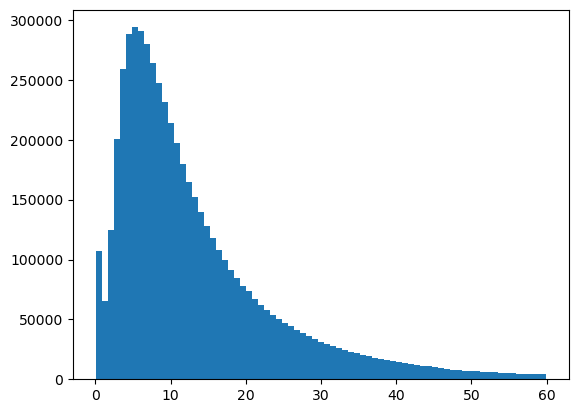

In [30]:
plt.hist(Underthousand['ride_duration'], bins = 75)
plt.show

In [31]:
#adding a column with the day of the week the ride started and ended. Sometimes the start time and end time are on different days.
Yearly['Start_day'] = Yearly['started_at'].apply(lambda a: a.weekday())
Yearly['End_day'] = Yearly['ended_at'].apply(lambda a: a.weekday())

In [32]:
# Creating two new subtables that contain only casual and annual members respectively
Casual = Yearly[Yearly['member_casual'] == 'casual']
Annual = Yearly[Yearly['member_casual'] == 'member']

In [33]:
# creating a column that contains the distance between start and end stations 
Yearly['start_cord'] = Yearly.apply(lambda row: (row['start_lat'], row['start_lng']), axis =1)
Yearly['end_cord'] = Yearly.apply(lambda row: (row['end_lat'], row['end_lng']), axis =1)

In [34]:
def Get_dist(x):
    dist = distance.distance((x['start_lat'], x['start_lng']), (x['end_lat'], x['end_lng'])).miles
    return dist

In [35]:
# Yearly_dist = Yearly[Yearly['end_lat'].notnull() & Yearly['end_lng'].notnull()]

In [36]:
# Yearly_dist['Distance'] = Yearly_dist.apply(lambda a: distance.distance((a['start_lat'],a['start_lng']),(a['end_lat'],a['end_lng'])).miles, axis = 1);

In [37]:
Yearly_dist

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,Start_day,End_day,start_cord,end_cord,Distance
0,0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2.950000,3,3,"(42.0128005, -87.665906)","(42.01256011541, -87.6743671152)",0.435817
1,1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,4.350000,0,0,"(42.012763, -87.6659675)","(42.01256011541, -87.6743671152)",0.432562
2,2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,4.350000,1,1,"(41.9256018819, -87.6537080423)","(41.92533, -87.6658)",0.623515
3,3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,14.933333,1,1,"(41.983593, -87.669154)","(41.961507, -87.671387)",1.528651
4,4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,6.033333,3,3,"(41.87785, -87.62408)","(41.88462107257936, -87.62783423066139)",0.505842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5661322,181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,3.733333,0,0,"(41.883165, -87.6511)","(41.8776415962753, -87.64961779117584)",0.388795
5661323,181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member,12.983333,2,2,"(41.949979544, -87.714018822)","(41.943403, -87.679618)",1.829663
5661324,181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member,4.550000,3,3,"(41.88314336439022, -87.63724207878113)","(41.881859328038225, -87.64926373958588)",0.626326
5661325,181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,3.933333,2,2,"(41.883165, -87.6511)","(41.8776415962753, -87.64961779117584)",0.388795


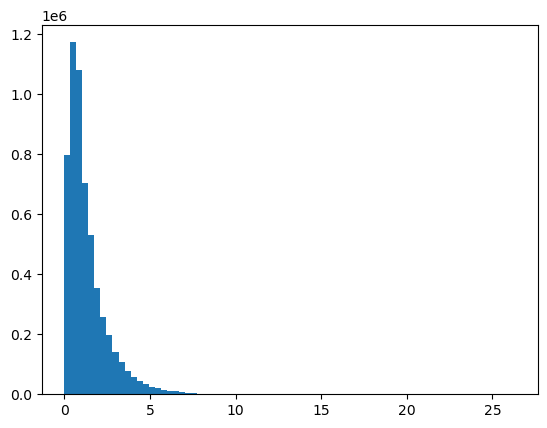

In [38]:
plt.hist(Yearly_dist['Distance'], bins = 75)
plt.show()

In [39]:
# splitting the tables by member type. Not sure if we need this but might as well do it anyway.
Casual = Yearly_dist[Yearly_dist['member_casual'] == 'casual']
Member = Yearly_dist[Yearly_dist['member_casual'] == 'member']

In [40]:
                                                             ''' *** Analyze *** '''

' *** Analyze *** '

In [41]:
Casual.describe()

,Unnamed: 0,start_lat,start_lng,end_lat,end_lng,ride_duration,Start_day,End_day,Distance
count,2.316599e+06,2.316599e+06,2.316599e+06,2.316599e+06,2.316599e+06,2.316599e+06,2.316599e+06,2.316599e+06,2.316599e+06
mean,3.329657e+05,4.190398e+01,-8.764782e+01,4.190431e+01,-8.764813e+01,2.198914e+01,3.349942e+00,3.351064e+00,1.350156e+00
std,2.170185e+05,4.531134e-02,3.116293e-02,4.551194e-02,3.141595e-02,6.315005e+01,1.998219e+00,2.000943e+00,1.229715e+00
min,0.000000e+00,4.164000e+01,-8.784000e+01,4.155000e+01,-8.805000e+01,1.666667e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.470950e+05,4.188209e+01,-8.766358e+01,4.188224e+01,-8.766375e+01,7.333333e+00,2.000000e+00,2.000000e+00,5.690194e-01
50%,3.045430e+05,4.190096e+01,-8.764288e+01,4.190231e+01,-8.764312e+01,1.296667e+01,4.000000e+00,4.000000e+00,1.030427e+00
75%,5.059985e+05,4.193000e+01,-8.762680e+01,4.193000e+01,-8.762680e+01,2.398333e+01,5.000000e+00,5.000000e+00,1.774202e+00
max,8.234820e+05,4.207000e+01,-8.752000e+01,4.219000e+01,-8.730000e+01,3.435407e+04,6.000000e+00,6.000000e+00,2.270092e+01


In [42]:
Member.describe()

,Unnamed: 0,start_lat,start_lng,end_lat,end_lng,ride_duration,Start_day,End_day,Distance
count,3.344728e+06,3.344728e+06,3.344728e+06,3.344728e+06,3.344728e+06,3.344728e+06,3.344728e+06,3.344728e+06,3.344728e+06
mean,2.894775e+05,4.190104e+01,-8.764785e+01,4.190121e+01,-8.764795e+01,1.241278e+01,2.860724e+00,2.861712e+00,1.300947e+00
std,2.124396e+05,4.676624e-02,2.814649e-02,4.692766e-02,2.820760e-02,1.952172e+01,1.934353e+00,1.935353e+00,1.172834e+00
min,0.000000e+00,4.164000e+01,-8.784000e+01,4.155000e+01,-8.814000e+01,1.666667e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.052500e+05,4.188000e+01,-8.766150e+01,4.188000e+01,-8.766150e+01,5.116667e+00,1.000000e+00,1.000000e+00,5.336299e-01
50%,2.469300e+05,4.189854e+01,-8.764450e+01,4.189859e+01,-8.764514e+01,8.833333e+00,3.000000e+00,3.000000e+00,9.382993e-01
75%,4.507530e+05,4.193000e+01,-8.763000e+01,4.193000e+01,-8.763000e+01,1.526667e+01,4.000000e+00,4.000000e+00,1.698436e+00
max,8.234870e+05,4.207000e+01,-8.752000e+01,4.237000e+01,-8.730000e+01,1.499933e+03,6.000000e+00,6.000000e+00,2.633535e+01


                        ''' *** Analysis of popular days of week to ride bikes between members and casual users *** '''
    ''' 
    We start with creating a histogram of usage by days of week between the two groups. The casual group clearly shows favored usaged on the weekends
    especially Saturday. The members group shows more usage during the weekends than the weekdays. With it peaking on Tuesdays, Wednesdays, and Thursdays.
    My hypothesis from these two histograms is that members are more likely to use bikes for their work commutes while casual users are more likely to use
    the bikes for recreation. To further validate this hypothesis I decided to analyze the times that bikes are likely to be used between the two groups
    If members are more likely to use bikes for commutes then we should see high usage during regular work commute hours around 8-9 and leaving work 
    around 4-5. Creating a histrogram again for both groups using time on the x axis, for the casual group I find low usage during morning commute hours and 
    useage gradually peaking between 5-6. However for the Members, We see big spikes in usage during both regular commute hours in the morning (7-8) and in the afternoon (5-6).
    With these findings I'm led to belive that most likely Members are more liklely to use the bikes for regular routines like work commutes 
    than casual members.
    '''

(array([277032., 263162., 273808., 308683., 333906., 472027., 387981.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

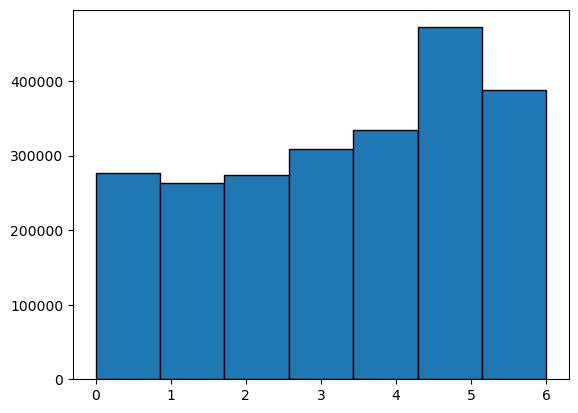

In [43]:
# popular days of week. 0 = monday 6 = sunday
plt.hist(Casual['Start_day'], bins = 7, edgecolor = 'black')

(array([473219., 518473., 523739., 532114., 466953., 443141., 387089.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

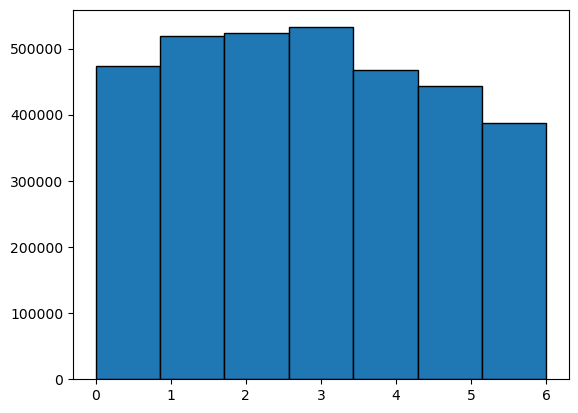

In [44]:
plt.hist(Member['Start_day'], bins = 7, edgecolor = 'black')

In [45]:

Casual_hourly = Casual['started_at'].apply(lambda x: (datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).time())
Casual_hourly = Casual_hourly.apply(lambda a: str(a)[0:2])
Casual_hourly = Casual_hourly.sort_values()
#Casual_hour.to_csv('/Users/jonachen/Desktop/Divvy/CSV/Casual_hourly.csv')


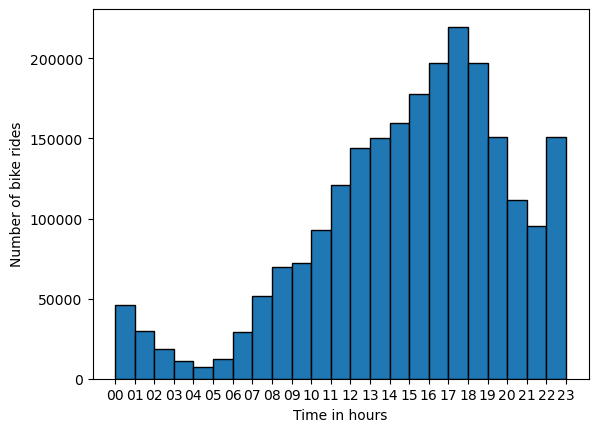

In [46]:
plt.hist(Casual_hourly, bins = 23, edgecolor = 'black')
plt.xlabel('Time in hours')
plt.ylabel('Number of bike rides')
plt.show()



In [47]:

Member_hour = Member['started_at'].apply(lambda x: (datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).time())
Member_hour = Member_hour.apply(lambda a: str(a)[0:2])
Member_hour = Member_hour.sort_values()


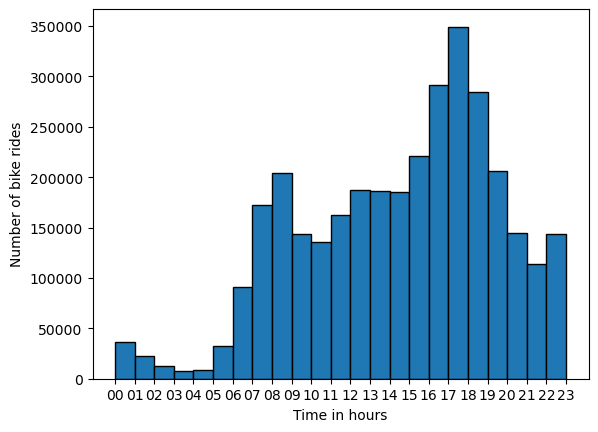

In [48]:
plt.hist(Member_hour, bins = 23, edgecolor = 'black')
plt.xlabel('Time in hours')
plt.ylabel('Number of bike rides')
plt.show()

In [49]:
Member.head(5)

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,Start_day,End_day,start_cord,end_cord,Distance
2,2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,4.350000,1,1,"(41.9256018819, -87.6537080423)","(41.92533, -87.6658)",0.623515
4,4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,6.033333,3,3,"(41.87785, -87.62408)","(41.88462107257936, -87.62783423066139)",0.505842
5,5,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member,3.366667,1,1,"(41.895634, -87.672069)","(41.903119, -87.673935)",0.525472
6,6,BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.954341,-87.686080,41.952833,-87.649993,member,16.566667,6,6,"(41.95434085219, -87.6860796243)","(41.952833, -87.649993)",1.862038
7,7,81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.925602,-87.653708,41.931931,-87.677856,member,12.066667,5,5,"(41.9256018819, -87.6537080423)","(41.931931, -87.677856)",1.318980


In [50]:
'''
# Maybe 1000 at 16 mins
Geocoders = geocoders.Nominatim(user_agent = 'Chicago heatmap')

def Getzip(df, Geocoders, lat, long):
    location = Geocoders.reverse((df[lat], df[long]))
    return location

sample = Member.sample(n=100)

zipcodes =  sample.apply(Getzip, axis = 1, Geocoders = Geocoders, lat = 'start_lat', long = 'start_lng')

print(zipcodes)
'''

"\n# Maybe 1000 at 16 mins\nGeocoders = geocoders.Nominatim(user_agent = 'Chicago heatmap')\n\ndef Getzip(df, Geocoders, lat, long):\n    location = Geocoders.reverse((df[lat], df[long]))\n    return location\n\nsample = Member.sample(n=100)\n\nzipcodes =  sample.apply(Getzip, axis = 1, Geocoders = Geocoders, lat = 'start_lat', long = 'start_lng')\n\nprint(zipcodes)\n"

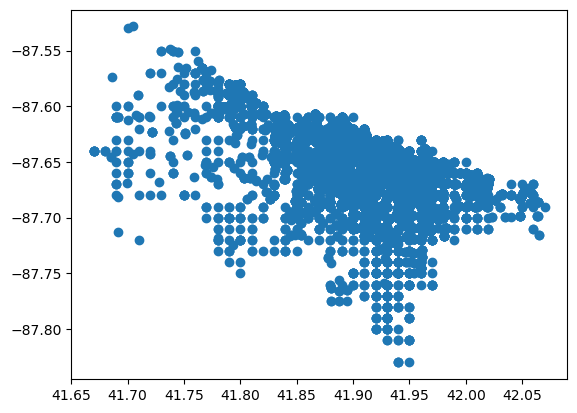

In [51]:
sample_mem = Member.sample(n = 30000)

plt.scatter(sample_mem['start_lat'], sample_mem['start_lng'])
plt.show()



/Users/jonachen/anaconda3/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/jonachen/anaconda3/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


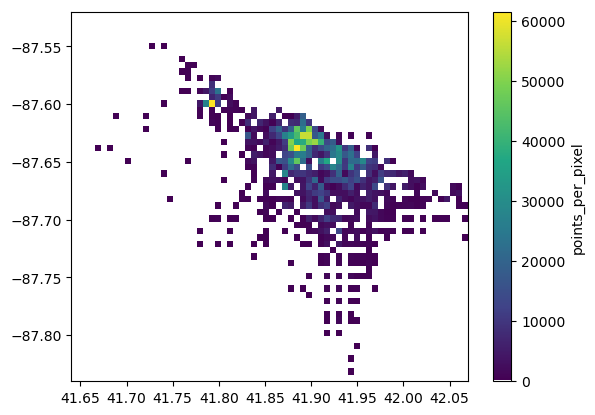

In [52]:

White_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20,'#440053'),
    (0.2,'#404388'),
    (0.4,'#2a788e'),
    (0.6,'#21a784'),
    (0.8,'#78d151'),
    (1,'#fde624'),
], N=256)

def using_mpl_scatter(fig, x, y):
    ax = fig.add_subplot(1,1,1, projection = 'scatter_density')
    density = ax.scatter_density(x,y,dpi = 18,cmap = White_viridis)
    fig.colorbar(density, label = 'points_per_pixel')
    
fig = plt.figure(dpi = 100)
using_mpl_scatter(fig, Member['start_lat'], Member['start_lng'])
plt.show()


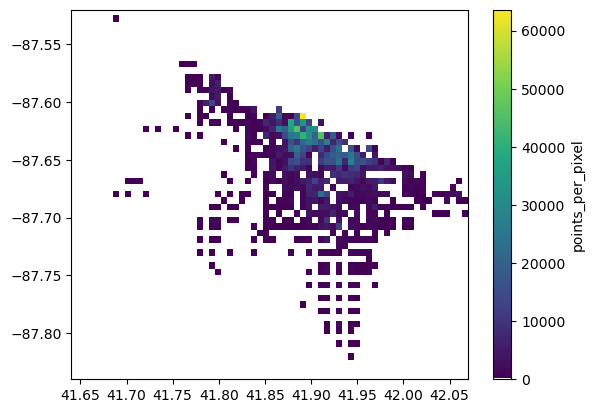

In [53]:

White_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20,'#440053'),
    (0.2,'#404388'),
    (0.4,'#2a788e'),
    (0.6,'#21a784'),
    (0.8,'#78d151'),
    (1,'#fde624'),
], N=256)

def using_mpl_scatter(fig, x, y):
    ax = fig.add_subplot(1,1,1, projection = 'scatter_density')
    density = ax.scatter_density(x,y,dpi = 18,cmap = White_viridis)
    fig.colorbar(density, label = 'points_per_pixel')
    
fig = plt.figure(dpi = 100)
using_mpl_scatter(fig, Casual['start_lat'], Casual['start_lng'])
plt.show()


Creating a map that shows the most popular areas for a bike ride between Members and Casual riders. The goal is to show that Members are more likely to 
ride in heavy traffic areas because a big reason for using the bikes to commutes is to avoid the traffic. 

An ideal outcome will show that Members ride in heavy traffic areas while Casual members are more random with where they choose to ride a bike

In [183]:
df_locations = Member.groupby(['start_station_name']).agg({"start_station_id":"count", "start_lat":"min", "start_lng":"min"})
df_locations;

In [184]:
df_locations = df_locations.sort_values(by = "start_station_id", ascending = False)
mtop_10 = df_locations.head(10)
mtop_10

,start_station_id,start_lat,start_lng
start_station_name,,,
Kingsbury St & Kinzie St,24932,41.888464,-87.639893
Clark St & Elm St,22028,41.860126,-87.654261
Wells St & Concord Ln,21294,41.886108,-87.766106
University Ave & 57th St,19941,41.788688,-87.602921
Clinton St & Washington Blvd,19825,41.860589,-87.749534
Ellis Ave & 60th St,19499,41.784636,-87.601315
Loomis St & Lexington St,19118,41.870924,-87.697292
Wells St & Elm St,18981,41.901995,-87.652183
Clinton St & Madison St,18928,41.880401,-87.751205


In [185]:
cdf_locations = Casual.groupby(['start_station_name']).agg({"start_station_id":"count", "start_lat":"min", "start_lng":"min"})
cdf_locations;

In [186]:
cdf_locations = cdf_locations.sort_values(by = "start_station_id", ascending = False)
ctop_10 = Cdf_locations.head(10)
ctop_10

,start_station_id,start_lat,start_lng
start_station_name,,,
Streeter Dr & Grand Ave,57844,41.705863,-87.807139
DuSable Lake Shore Dr & Monroe St,31747,41.851705,-87.784401
Millennium Park,25400,41.860967,-87.751200
Michigan Ave & Oak St,25225,41.868080,-87.649977
DuSable Lake Shore Dr & North Blvd,23583,41.691758,-87.807157
Shedd Aquarium,20194,41.808030,-87.807246
Theater on the Lake,18416,41.889748,-87.761669
Wells St & Concord Ln,16196,41.816297,-87.644457
Dusable Harbor,14034,41.858175,-87.717691


In [58]:
''' 
Create a tuple with the coordinates of the top ten stations and then plot them on map to see if the most popular stations are located
in the heart of the city 
'''

' \nCreate a tuple with the coordinates of the top ten stations and then plot them on map to see if the most popular stations are located\nin the heart of the city \n'

In [187]:
Chicago = folium.Map(location = [41.881832, -87.623177], width = '65%', height = '65%' )


In [188]:
m_lat = mtop_10['start_lat']
m_lng = mtop_10['start_lng']
mpop_coordinates = list(zip(m_lat, m_lng))

c_lat = ctop_10['start_lat']
c_lng = ctop_10['start_lng']
cpop_coordinates = list(zip(c_lat,c_lng))

In [191]:
"""
folium.Marker(
    location= mpop_coordinates[1],
    tooltip="Click me!",
    icon=folium.Icon(icon="cloud"),
).add_to(Chicago)
folium.Marker(
    location= mpop_coordinates[2],
    tooltip="Click me!",
    icon=folium.Icon(icon="cloud"),
).add_to(Chicago)
"""

for i in range(0,len(mpop_coordinates)):
    folium.Marker(
    location= mpop_coordinates[i],
    icon=folium.Icon(color ="green"),
).add_to(Chicago)
    folium.Marker(
    location= cpop_coordinates[i],
    icon=folium.Icon(color ="red"),
).add_to(Chicago)


In [192]:
Chicago